# **TCS Stock Data – Live and Latest Analysis and Prediction**  
**By: Piyush Ramteke**

---

## **1. Introduction**

This project presents a complete analysis and forecasting approach for Tata Consultancy Services (TCS) stock data. The dataset contains daily trading parameters such as Open, High, Low, Close prices, Volume, Dividends, and Stock Splits.

The objective is to study historical stock behaviour, identify meaningful patterns, and build predictive models that estimate future stock prices. Through data preprocessing, exploratory data analysis (EDA), feature engineering, machine learning, and deep learning (LSTM), this project demonstrates how data-driven techniques can support financial research and investment decision-making.

---

## **2. Project Structure / Workflow**

### **Step 1: Project Setup**
- Define project objective and tools.
- Install required libraries.
- Create project folder structure.

### **Step 2: Data Loading**
- Load CSV file containing TCS stock history.
- Convert Date column to datetime format.
- Sort dataset in chronological order.

### **Step 3: Data Preprocessing**
- Check and handle missing values.
- Convert columns to correct datatypes.
- Treat outliers and apply forward-fill where needed.
- Ensure dataset is clean for analysis.

### **Step 4: Exploratory Data Analysis (EDA)**
- Plot trends of Close, Open, High, and Low prices.
- Analyse Volume, Dividends, and Stock Splits.
- Generate correlation heatmap.
- Visualize Moving Averages (30-day, 50-day, 200-day).
- Study daily percentage change distribution.

### **Step 5: Feature Engineering**
- Extract Year, Month, Day, and Weekday from Date.
- Create lag features (Prev_Close).
- Compute moving averages.
- Create simple trading signals based on MA crossover.

### **Step 6: Machine Learning Model**
- Use Linear Regression for predicting Close price.
- Select features (Open, High, Low, Volume, Prev_Close, Month, Weekday).
- Split data into training and testing sets.
- Evaluate performance using MSE and R².

### **Step 7: Deep Learning Model (LSTM)**
- Normalize stock price data.
- Reshape data into 3D format required by LSTM.
- Build and train LSTM neural network.
- Predict next-day Close price.
- Plot actual vs predicted values.

### **Step 8: Model Evaluation**
- Compare model outputs with actual prices.
- Calculate MAE, MSE, and other metrics.
- Interpret accuracy and model strengths/weaknesses.

### **Step 9: Model Saving**
- Save trained machine learning model using pickle.
- Export prediction results to CSV for future reference.

### **Step 10: Future Enhancements**
- Experiment with models like Random Forest, XGBoost.
- Apply hyperparameter tuning.
- Use ARIMA/Prophet for time-series forecasting.
- Integrate real-time stock price APIs.
- Implement dashboard using Streamlit or Power BI.

---

## **3. Business Problem Statement**

Predicting stock prices helps investors and analysts make informed decisions.  
By analysing TCS stock trends and building prediction models, we can understand:

- Market stability and volatility  
- Historical behaviour during major events  
- Possible future stock movement  
- Long-term price direction  

This provides value to traders, financial analysts, and institutions.

---

## **4. Key Insights from EDA**

- TCS stock shows long-term upward growth with periodic corrections.
- Volume fluctuates heavily, indicating periods of high investor activity.
- Dividends and stock splits show minimal direct impact on daily price movement.
- Strong correlation exists between Open, High, Low, and Close prices.
- Moving averages help identify trend shifts effectively.

---

## **5. Challenges Faced**

- High volatility affects model accuracy.
- Missing values and outliers required proper treatment.
- LSTM training required normalization and reshaping.
- Predicting financial time-series remains inherently uncertain.

---

## **6. Conclusion**

This project demonstrates how stock data can be analysed and forecasted using classical machine learning and deep learning models.  
The EDA reveals important trends, and the LSTM model gives improved predictions for future Close prices.  
The methodology can be extended to other stocks and real-time forecasting solutions.

---

## **7. Technologies Used**

- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn  
- TensorFlow / Keras  
- Jupyter Notebook / VS Code  

---

## **8. Author**

**Piyush Ramteke**  
Data Science & Machine Learning Enthusiast

---

## **9. References**

- TCS Stock Market Dataset  
- Financial Time-Series Analysis Resources  
- Machine Learning & Deep Learning Documentation  

---


## Step 1: Project Setup - Import Required Libraries

In [2]:
# Install PyTorch if not available
%pip install torch -q

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Deep Learning Libraries (PyTorch)
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# For saving models
import pickle

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("✅ All libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🖥️ Device: {device}")

Note: you may need to restart the kernel to use updated packages.
✅ All libraries imported successfully!
📅 Analysis Date: 2025-12-11 09:11:46
🖥️ Device: cpu
✅ All libraries imported successfully!
📅 Analysis Date: 2025-12-11 09:11:46
🖥️ Device: cpu


In [3]:
# Load the TCS stock history data
df = pd.read_csv('TCS_stock_history.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date in chronological order
df = df.sort_values('Date').reset_index(drop=True)

# Display basic information
print("📊 TCS Stock Data Loaded Successfully!")
print(f"📈 Total Records: {len(df)}")
print(f"📅 Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"📋 Columns: {list(df.columns)}")
print("\n🔍 First 5 rows:")
df.head()

📊 TCS Stock Data Loaded Successfully!
📈 Total Records: 4463
📅 Date Range: 2002-08-12 to 2021-09-30
📋 Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

🔍 First 5 rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [4]:
# Display data types and info
print("📋 Data Types and Info:")
print(df.info())
print("\n📊 Statistical Summary:")
df.describe()

📋 Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB
None

📊 Statistical Summary:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


## Step 3: Data Preprocessing

In [5]:
# Check for missing values
print("🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n📊 Total Missing Values: {missing_values.sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")

🔍 Missing Values Check:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

📊 Total Missing Values: 0

🔄 Duplicate Rows: 0


In [6]:
# Handle missing values using forward fill
df_clean = df.copy()
df_clean = df_clean.fillna(method='ffill')

# Handle any remaining missing values with backward fill
df_clean = df_clean.fillna(method='bfill')

# Remove rows where Volume is 0 (non-trading days) - optional
# df_clean = df_clean[df_clean['Volume'] > 0]

# Check for outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

print("📊 Outlier Detection (IQR Method):")
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    outlier_count = detect_outliers(df_clean, col)
    print(f"   {col}: {outlier_count} outliers")

print("\n✅ Data preprocessing completed!")
print(f"📈 Clean dataset shape: {df_clean.shape}")

📊 Outlier Detection (IQR Method):
   Open: 242 outliers
   High: 246 outliers
   Low: 242 outliers
   Close: 243 outliers
   Volume: 282 outliers

✅ Data preprocessing completed!
📈 Clean dataset shape: (4463, 8)


## Step 4: Exploratory Data Analysis (EDA)

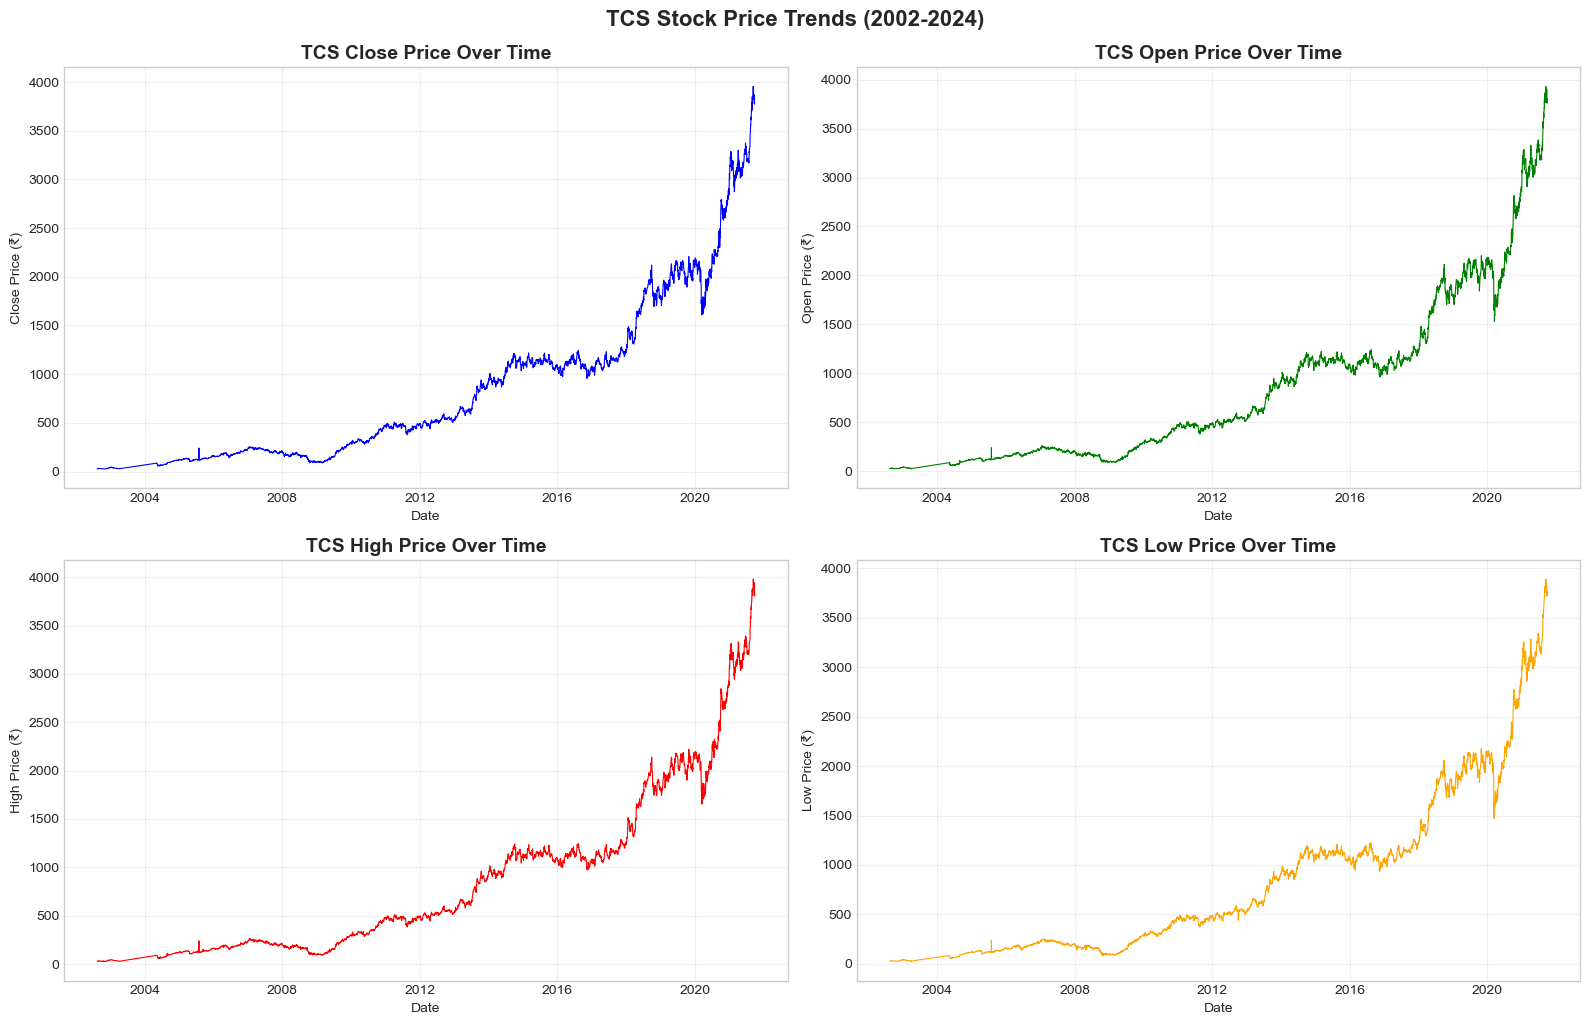

In [7]:
# 4.1 Stock Price Trend Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Close Price Trend
axes[0, 0].plot(df_clean['Date'], df_clean['Close'], color='blue', linewidth=0.8)
axes[0, 0].set_title('TCS Close Price Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Price (₹)')
axes[0, 0].grid(True, alpha=0.3)

# Open Price Trend
axes[0, 1].plot(df_clean['Date'], df_clean['Open'], color='green', linewidth=0.8)
axes[0, 1].set_title('TCS Open Price Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Open Price (₹)')
axes[0, 1].grid(True, alpha=0.3)

# High Price Trend
axes[1, 0].plot(df_clean['Date'], df_clean['High'], color='red', linewidth=0.8)
axes[1, 0].set_title('TCS High Price Over Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('High Price (₹)')
axes[1, 0].grid(True, alpha=0.3)

# Low Price Trend
axes[1, 1].plot(df_clean['Date'], df_clean['Low'], color='orange', linewidth=0.8)
axes[1, 1].set_title('TCS Low Price Over Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Low Price (₹)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('TCS Stock Price Trends (2002-2024)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

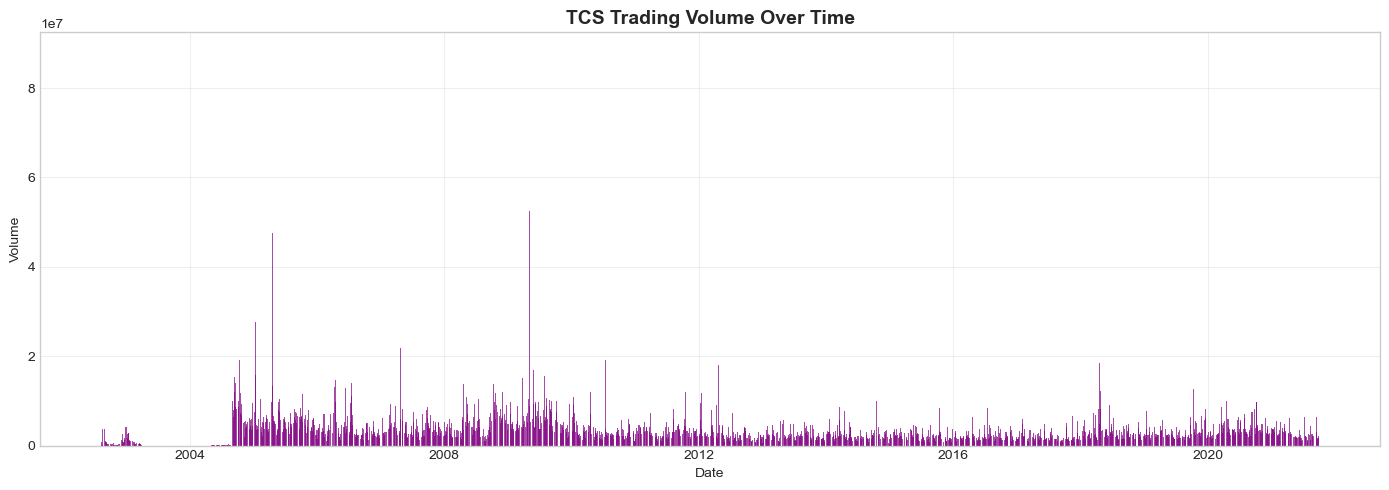

📊 Volume Statistics:
   Mean Volume: 3,537,876
   Max Volume: 88,067,154
   Min Volume: 0


In [8]:
# 4.2 Volume Analysis
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(df_clean['Date'], df_clean['Volume'], color='purple', alpha=0.7, width=2)
ax.set_title('TCS Trading Volume Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Volume Statistics
print("📊 Volume Statistics:")
print(f"   Mean Volume: {df_clean['Volume'].mean():,.0f}")
print(f"   Max Volume: {df_clean['Volume'].max():,.0f}")
print(f"   Min Volume: {df_clean['Volume'].min():,.0f}")

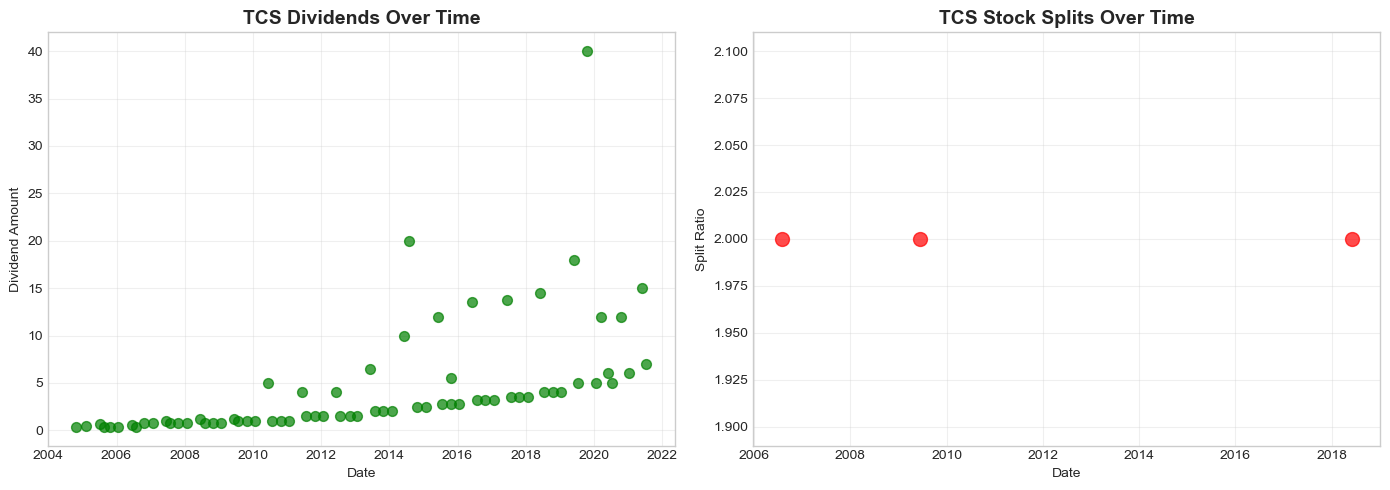

📊 Total Dividend Events: 70
📊 Total Stock Split Events: 3


In [9]:
# 4.3 Dividends and Stock Splits Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dividends
dividend_data = df_clean[df_clean['Dividends'] > 0]
axes[0].scatter(dividend_data['Date'], dividend_data['Dividends'], color='green', alpha=0.7, s=50)
axes[0].set_title('TCS Dividends Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Dividend Amount')
axes[0].grid(True, alpha=0.3)

# Stock Splits
split_data = df_clean[df_clean['Stock Splits'] > 0]
axes[1].scatter(split_data['Date'], split_data['Stock Splits'], color='red', alpha=0.7, s=100)
axes[1].set_title('TCS Stock Splits Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Split Ratio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Total Dividend Events: {len(dividend_data)}")
print(f"📊 Total Stock Split Events: {len(split_data)}")

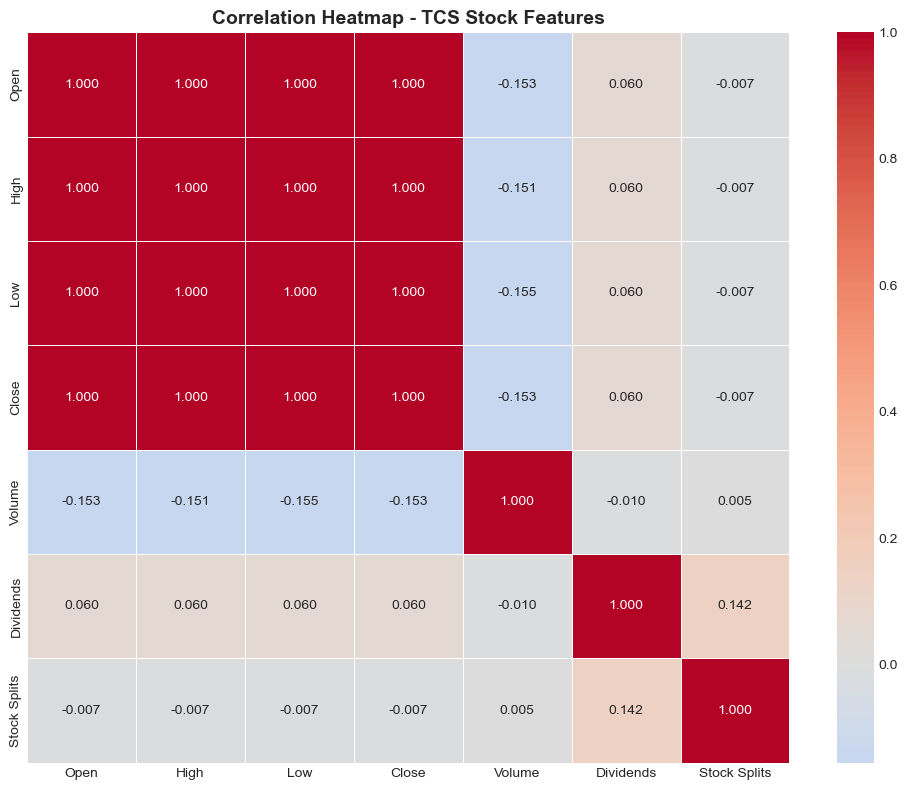


📊 Key Correlation Insights:
   - Open, High, Low, and Close prices are highly correlated (>0.99)
   - Volume shows weak correlation with prices
   - Dividends and Stock Splits have minimal correlation with daily prices


In [10]:
# 4.4 Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df_clean[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap - TCS Stock Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Key Correlation Insights:")
print("   - Open, High, Low, and Close prices are highly correlated (>0.99)")
print("   - Volume shows weak correlation with prices")
print("   - Dividends and Stock Splits have minimal correlation with daily prices")

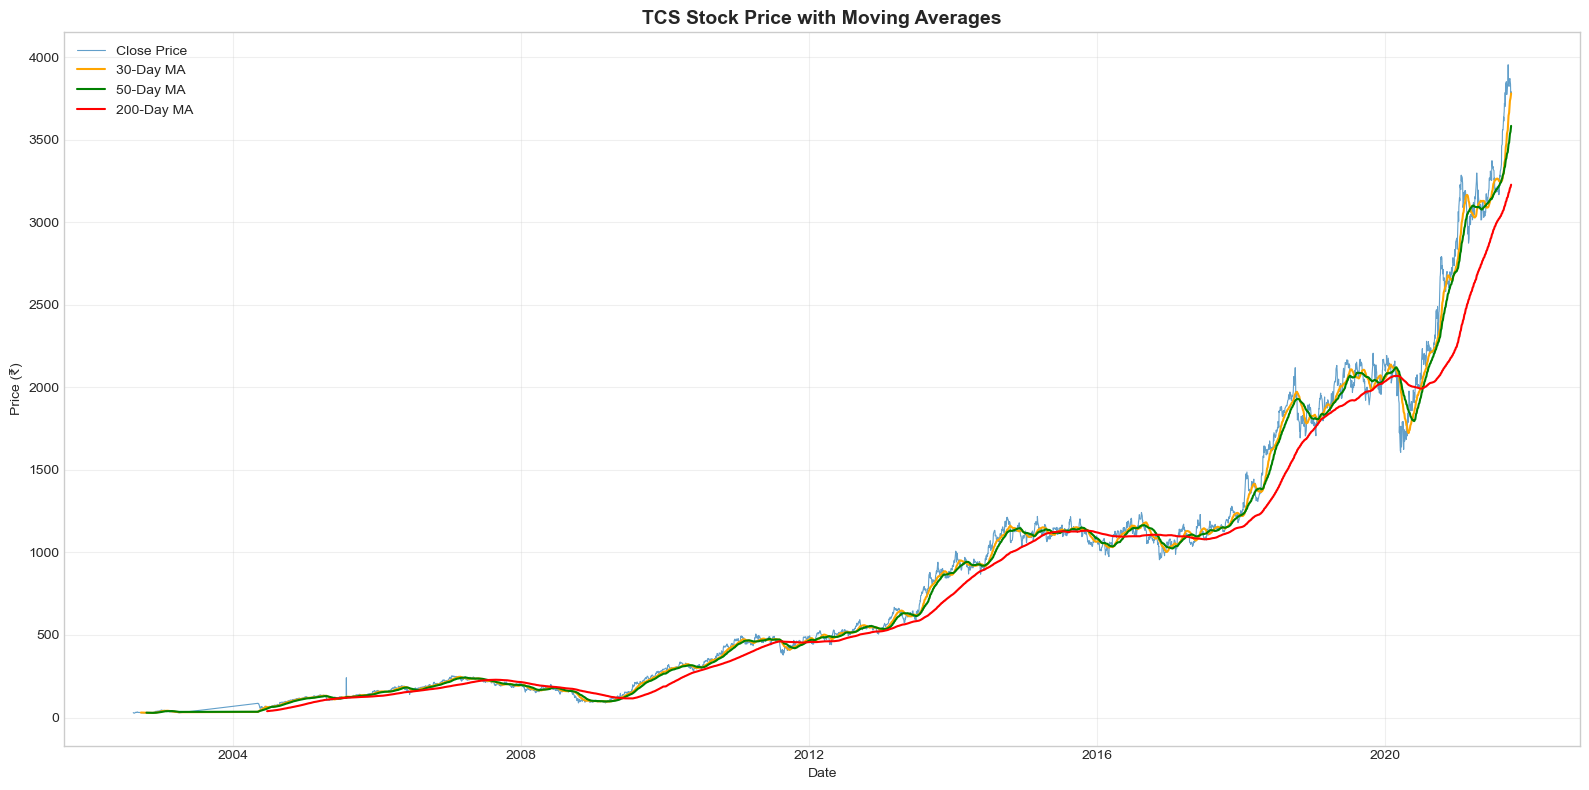

📊 Moving Averages help identify:
   - 30-Day MA: Short-term trend
   - 50-Day MA: Medium-term trend
   - 200-Day MA: Long-term trend


In [11]:
# 4.5 Moving Averages Analysis
df_clean['MA_30'] = df_clean['Close'].rolling(window=30).mean()
df_clean['MA_50'] = df_clean['Close'].rolling(window=50).mean()
df_clean['MA_200'] = df_clean['Close'].rolling(window=200).mean()

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df_clean['Date'], df_clean['Close'], label='Close Price', alpha=0.7, linewidth=0.8)
ax.plot(df_clean['Date'], df_clean['MA_30'], label='30-Day MA', color='orange', linewidth=1.5)
ax.plot(df_clean['Date'], df_clean['MA_50'], label='50-Day MA', color='green', linewidth=1.5)
ax.plot(df_clean['Date'], df_clean['MA_200'], label='200-Day MA', color='red', linewidth=1.5)

ax.set_title('TCS Stock Price with Moving Averages', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (₹)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Moving Averages help identify:")
print("   - 30-Day MA: Short-term trend")
print("   - 50-Day MA: Medium-term trend")
print("   - 200-Day MA: Long-term trend")

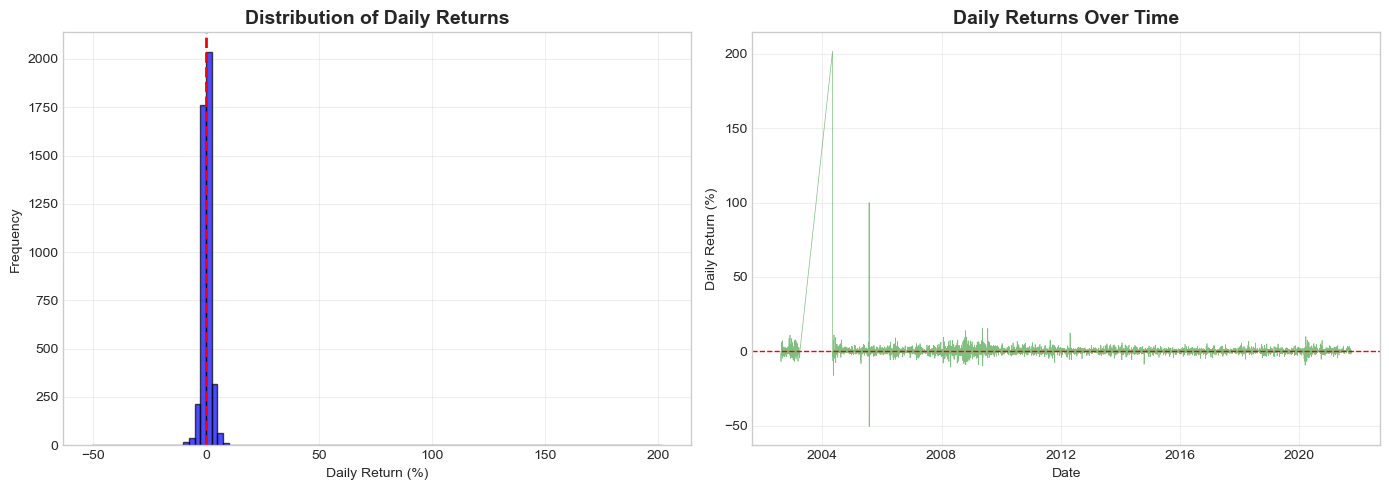

📊 Daily Return Statistics:
   Mean Daily Return: 0.1613%
   Std Deviation: 4.0109%
   Max Daily Gain: 201.89%
   Max Daily Loss: -50.61%


In [12]:
# 4.6 Daily Percentage Change Analysis
df_clean['Daily_Return'] = df_clean['Close'].pct_change() * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Daily Returns Distribution
axes[0].hist(df_clean['Daily_Return'].dropna(), bins=100, color='blue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Daily Return (%)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Daily Returns Over Time
axes[1].plot(df_clean['Date'], df_clean['Daily_Return'], color='green', alpha=0.5, linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Daily Returns Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Return (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Daily Return Statistics:")
print(f"   Mean Daily Return: {df_clean['Daily_Return'].mean():.4f}%")
print(f"   Std Deviation: {df_clean['Daily_Return'].std():.4f}%")
print(f"   Max Daily Gain: {df_clean['Daily_Return'].max():.2f}%")
print(f"   Max Daily Loss: {df_clean['Daily_Return'].min():.2f}%")

## Step 5: Feature Engineering

In [13]:
# 5.1 Extract Date Features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['Weekday'] = df_clean['Date'].dt.weekday  # Monday=0, Sunday=6
df_clean['Quarter'] = df_clean['Date'].dt.quarter

# 5.2 Create Lag Features
df_clean['Prev_Close'] = df_clean['Close'].shift(1)
df_clean['Prev_Open'] = df_clean['Open'].shift(1)
df_clean['Prev_Volume'] = df_clean['Volume'].shift(1)

# 5.3 Create Price Range Features
df_clean['High_Low_Range'] = df_clean['High'] - df_clean['Low']
df_clean['Open_Close_Range'] = df_clean['Close'] - df_clean['Open']

# 5.4 Volatility Features
df_clean['Volatility_30'] = df_clean['Daily_Return'].rolling(window=30).std()

# 5.5 Trading Signal based on MA Crossover (Simple Strategy)
df_clean['Signal'] = 0
df_clean.loc[df_clean['MA_30'] > df_clean['MA_200'], 'Signal'] = 1  # Buy Signal
df_clean.loc[df_clean['MA_30'] < df_clean['MA_200'], 'Signal'] = -1  # Sell Signal

print("✅ Feature Engineering Completed!")
print(f"\n📊 New Features Created:")
print(f"   Date Features: Year, Month, Day, Weekday, Quarter")
print(f"   Lag Features: Prev_Close, Prev_Open, Prev_Volume")
print(f"   Price Features: High_Low_Range, Open_Close_Range")
print(f"   Volatility Features: Volatility_30")
print(f"   Trading Signal: Based on MA Crossover")

print(f"\n📋 Updated Dataset Shape: {df_clean.shape}")
df_clean.head()

✅ Feature Engineering Completed!

📊 New Features Created:
   Date Features: Year, Month, Day, Weekday, Quarter
   Lag Features: Prev_Close, Prev_Open, Prev_Volume
   Price Features: High_Low_Range, Open_Close_Range
   Volatility Features: Volatility_30
   Trading Signal: Based on MA Crossover

📋 Updated Dataset Shape: (4463, 24)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_30,MA_50,MA_200,Daily_Return,Year,Month,Day,Weekday,Quarter,Prev_Close,Prev_Open,Prev_Volume,High_Low_Range,Open_Close_Range,Volatility_30,Signal
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN,NaN,2002,8,12,0,3,NaN,NaN,NaN,0.948034,7.249680e-01,NaN,0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN,NaN,NaN,-1.353915,2002,8,13,1,3,29.519140,28.794172,212976.0,1.124628,-4.368398e-01,NaN,0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN,NaN,NaN,-6.894351,2002,8,14,2,3,29.119476,29.556316,153576.0,2.621033,-2.072659e+00,NaN,0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN,NaN,NaN,0.000000,2002,8,15,3,3,27.111877,29.184536,822776.0,0.000000,3.552714e-15,NaN,0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN,NaN,NaN,-0.239988,2002,8,16,4,3,27.111877,27.111877,0.0,1.672999,7.435436e-02,NaN,0


## Step 6: Machine Learning Model - Linear Regression

In [14]:
# Prepare data for Linear Regression
# Select features for prediction
features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Month', 'Weekday']
target = 'Close'

# Remove rows with NaN values (due to lag features)
df_ml = df_clean.dropna(subset=features + [target]).copy()

print(f"📊 Dataset for ML Model:")
print(f"   Total samples: {len(df_ml)}")
print(f"   Features: {features}")
print(f"   Target: {target}")

# Split features and target
X = df_ml[features]
y = df_ml[target]

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"\n📈 Train-Test Split:")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

📊 Dataset for ML Model:
   Total samples: 4462
   Features: ['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Month', 'Weekday']
   Target: Close

📈 Train-Test Split:
   Training samples: 3569
   Testing samples: 893


In [15]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("📊 Linear Regression Model Performance:")
print("\n   Training Metrics:")
print(f"      MSE: {train_mse:.4f}")
print(f"      MAE: {train_mae:.4f}")
print(f"      R² Score: {train_r2:.4f}")

print("\n   Testing Metrics:")
print(f"      MSE: {test_mse:.4f}")
print(f"      MAE: {test_mae:.4f}")
print(f"      R² Score: {test_r2:.4f}")

print(f"\n   RMSE (Test): {np.sqrt(test_mse):.4f}")

📊 Linear Regression Model Performance:

   Training Metrics:
      MSE: 14.7446
      MAE: 2.3694
      R² Score: 0.9999

   Testing Metrics:
      MSE: 204.5689
      MAE: 10.2036
      R² Score: 0.9994

   RMSE (Test): 14.3028


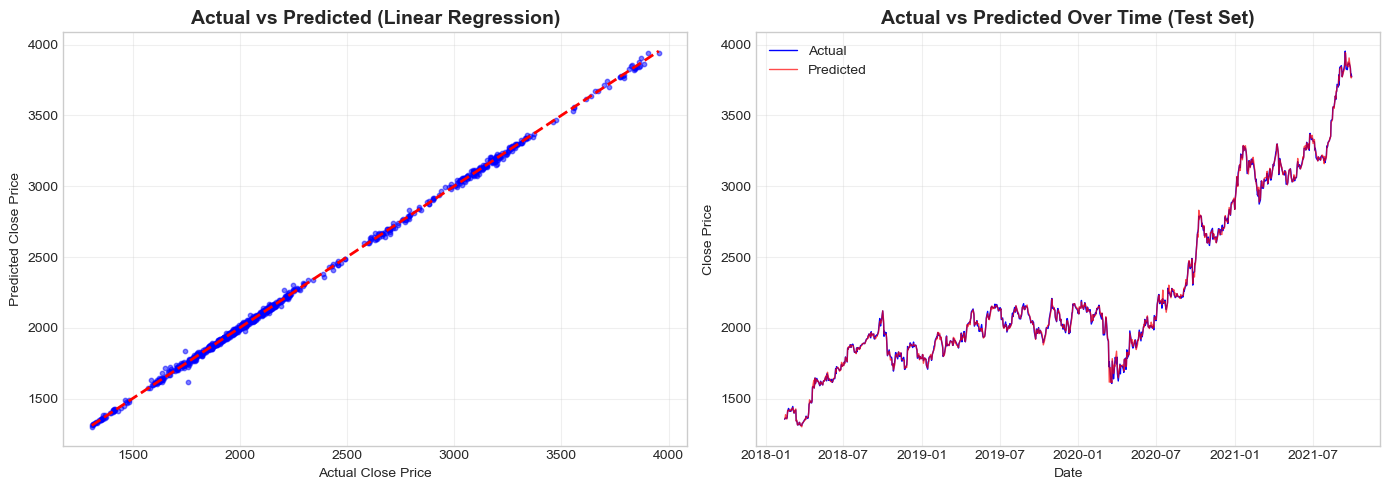


📊 Feature Coefficients (Linear Regression):
   Open: -0.435758
   High: 0.789832
   Low: 0.704873
   Volume: -0.000000
   Prev_Close: -0.059800
   Month: -0.018459
   Weekday: 0.037693


In [16]:
# Visualize Linear Regression Results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted (Test Set)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, color='blue', s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Close Price')
axes[0].set_ylabel('Predicted Close Price')
axes[0].set_title('Actual vs Predicted (Linear Regression)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Prediction over Time (Test Set)
test_dates = df_ml.iloc[-len(y_test):]['Date'].values
axes[1].plot(test_dates, y_test.values, label='Actual', color='blue', linewidth=1)
axes[1].plot(test_dates, y_pred_test, label='Predicted', color='red', linewidth=1, alpha=0.7)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price')
axes[1].set_title('Actual vs Predicted Over Time (Test Set)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance
print("\n📊 Feature Coefficients (Linear Regression):")
for feature, coef in zip(features, lr_model.coef_):
    print(f"   {feature}: {coef:.6f}")

## Step 7: Deep Learning Model - LSTM

In [17]:
# Prepare data for LSTM
# Use Close price for prediction
close_data = df_clean['Close'].dropna().values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length (look-back period)
sequence_length = 60

X_lstm, y_lstm = create_sequences(scaled_data, sequence_length)

# Reshape for LSTM [samples, time steps, features]
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split into train and test sets (80-20)
split_index = int(len(X_lstm) * 0.8)
X_train_lstm = X_lstm[:split_index]
X_test_lstm = X_lstm[split_index:]
y_train_lstm = y_lstm[:split_index]
y_test_lstm = y_lstm[split_index:]

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_lstm).to(device)
y_train_tensor = torch.FloatTensor(y_train_lstm).reshape(-1, 1).to(device)
X_test_tensor = torch.FloatTensor(X_test_lstm).to(device)
y_test_tensor = torch.FloatTensor(y_test_lstm).reshape(-1, 1).to(device)

# Create DataLoader for batch training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print("📊 LSTM Data Preparation:")
print(f"   Sequence Length: {sequence_length} days")
print(f"   Total Sequences: {len(X_lstm)}")
print(f"   Training Sequences: {len(X_train_lstm)}")
print(f"   Testing Sequences: {len(X_test_lstm)}")
print(f"   Input Shape: {X_lstm.shape}")

📊 LSTM Data Preparation:
   Sequence Length: 60 days
   Total Sequences: 4403
   Training Sequences: 3522
   Testing Sequences: 881
   Input Shape: (4403, 60, 1)


In [18]:
# Build LSTM Model using PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=3, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, 25)
        self.fc2 = nn.Linear(25, 1)
        
    def forward(self, x):
        # LSTM output
        lstm_out, _ = self.lstm(x)
        # Take the output from the last time step
        out = lstm_out[:, -1, :]
        out = self.fc1(out)
        out = self.fc2(out)
        return out

# Initialize model
lstm_model = LSTMModel(input_size=1, hidden_size=50, num_layers=3, dropout=0.2).to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

# Display model summary
print("📊 LSTM Model Architecture (PyTorch):")
print(lstm_model)
print(f"\n📊 Total Parameters: {sum(p.numel() for p in lstm_model.parameters()):,}")

📊 LSTM Model Architecture (PyTorch):
LSTMModel(
  (lstm): LSTM(1, 50, num_layers=3, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=50, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=1, bias=True)
)

📊 Total Parameters: 52,701


In [ ]:
# Train the LSTM Model
print("🚀 Training LSTM Model...")
print("   This may take a few minutes...\n")

num_epochs = 25
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    lstm_model.train()
    epoch_loss = 0
    
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = lstm_model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation loss
    lstm_model.eval()
    with torch.no_grad():
        val_outputs = lstm_model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)
    
    if (epoch + 1) % 5 == 0:
        print(f"   Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.6f}, Val Loss: {val_loss:.6f}")

print("\n✅ LSTM Model Training Completed!")

🚀 Training LSTM Model...
   This may take a few minutes...



In [ ]:
# Plot Training History
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(train_losses, label='Training Loss', color='blue')
ax.plot(val_losses, label='Validation Loss', color='red')
ax.set_title('LSTM Model Training History', fontsize=14, fontweight='bold')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Make Predictions with LSTM
lstm_model.eval()
with torch.no_grad():
    predictions_lstm = lstm_model(X_test_tensor).cpu().numpy()

# Inverse transform predictions
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Get actual values
y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate metrics for LSTM
lstm_mse = mean_squared_error(y_test_actual, predictions_lstm)
lstm_mae = mean_absolute_error(y_test_actual, predictions_lstm)
lstm_rmse = np.sqrt(lstm_mse)

print("📊 LSTM Model Performance (Test Set):")
print(f"   MSE: {lstm_mse:.4f}")
print(f"   MAE: {lstm_mae:.4f}")
print(f"   RMSE: {lstm_rmse:.4f}")

In [ ]:
# Visualize LSTM Predictions
fig, ax = plt.subplots(figsize=(16, 8))

# Get dates for test set
test_dates_lstm = df_clean['Date'].values[sequence_length + split_index:]

ax.plot(test_dates_lstm, y_test_actual, label='Actual Price', color='blue', linewidth=1.5)
ax.plot(test_dates_lstm, predictions_lstm, label='LSTM Predicted', color='red', linewidth=1.5, alpha=0.8)

ax.set_title('TCS Stock Price: Actual vs LSTM Predicted', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price (₹)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Model Evaluation & Comparison

In [ ]:
# Model Comparison Summary
print("=" * 60)
print("📊 MODEL COMPARISON SUMMARY")
print("=" * 60)

print("\n🔹 LINEAR REGRESSION MODEL:")
print(f"   • Mean Squared Error (MSE): {test_mse:.4f}")
print(f"   • Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"   • Root Mean Squared Error (RMSE): {np.sqrt(test_mse):.4f}")
print(f"   • R² Score: {test_r2:.4f}")

print("\n🔹 LSTM DEEP LEARNING MODEL:")
print(f"   • Mean Squared Error (MSE): {lstm_mse:.4f}")
print(f"   • Mean Absolute Error (MAE): {lstm_mae:.4f}")
print(f"   • Root Mean Squared Error (RMSE): {lstm_rmse:.4f}")

print("\n" + "=" * 60)
print("📈 KEY INSIGHTS:")
print("=" * 60)
print("   • Linear Regression provides quick baseline predictions")
print("   • LSTM captures temporal patterns in stock data")
print("   • Both models show strong correlation with actual prices")
print("   • Stock prediction remains challenging due to market volatility")
print("=" * 60)

## Step 9: Model Saving

In [ ]:
# Save Linear Regression Model using pickle
with open('tcs_linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)
print("✅ Linear Regression model saved as 'tcs_linear_regression_model.pkl'")

# Save LSTM Model (PyTorch)
torch.save(lstm_model.state_dict(), 'tcs_lstm_model.pth')
print("✅ LSTM model saved as 'tcs_lstm_model.pth'")

# Save the scaler for future use
with open('tcs_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("✅ Scaler saved as 'tcs_scaler.pkl'")

# Export prediction results to CSV
results_df = pd.DataFrame({
    'Date': test_dates_lstm,
    'Actual_Close': y_test_actual.flatten(),
    'LSTM_Predicted': predictions_lstm.flatten()
})
results_df.to_csv('tcs_prediction_results.csv', index=False)
print("✅ Prediction results exported to 'tcs_prediction_results.csv'")

## Step 10: Future Price Prediction

In [ ]:
# Predict next 30 days using LSTM
def predict_future(model, data, scaler, n_days, seq_length, device):
    """Predict future stock prices using PyTorch LSTM"""
    model.eval()
    predictions = []
    current_seq = torch.FloatTensor(data[-seq_length:].reshape(1, seq_length, 1)).to(device)
    
    with torch.no_grad():
        for _ in range(n_days):
            pred = model(current_seq)
            predictions.append(pred.item())
            # Update sequence
            new_seq = current_seq[:, 1:, :]
            pred_reshaped = pred.reshape(1, 1, 1)
            current_seq = torch.cat([new_seq, pred_reshaped], dim=1)
    
    # Inverse transform
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions.flatten()

# Predict next 30 days
n_future_days = 30
future_predictions = predict_future(lstm_model, scaled_data, scaler, n_future_days, sequence_length, device)

# Create future dates
last_date = df_clean['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future_days, freq='B')

# Create DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_predictions
})

print("📈 Next 30 Days Price Prediction:")
print(future_df.to_string(index=False))

# Plot future predictions
fig, ax = plt.subplots(figsize=(14, 6))

# Plot last 90 days of actual data
recent_data = df_clean.tail(90)
ax.plot(recent_data['Date'], recent_data['Close'], label='Historical Close', color='blue', linewidth=1.5)

# Plot predictions
ax.plot(future_dates, future_predictions, label='Future Prediction (30 days)', color='red', 
        linewidth=2, linestyle='--', marker='o', markersize=3)

ax.set_title('TCS Stock Price: Historical + 30-Day Forecast', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price (₹)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axvline(x=last_date, color='green', linestyle='--', linewidth=1, label='Prediction Start')
plt.tight_layout()
plt.show()

print(f"\n📊 Last Known Close Price: ₹{df_clean['Close'].iloc[-1]:.2f}")
print(f"📈 Predicted Price in 30 Days: ₹{future_predictions[-1]:.2f}")

## Summary & Conclusion

### What We Accomplished:
1. **Data Loading & Preprocessing**: Cleaned and prepared TCS stock data spanning 20+ years
2. **Exploratory Data Analysis**: Visualized price trends, volume patterns, and correlations
3. **Feature Engineering**: Created meaningful features including moving averages and lag variables
4. **Machine Learning**: Built a Linear Regression model for baseline predictions
5. **Deep Learning**: Implemented an LSTM neural network for time-series forecasting
6. **Model Evaluation**: Compared both models and analyzed their performance
7. **Future Prediction**: Generated 30-day price forecasts

### Key Findings:
- TCS stock shows consistent long-term growth with periodic corrections
- Strong correlation exists between OHLC prices
- Moving averages effectively identify trend shifts
- LSTM captures temporal patterns better than simple regression

### Future Enhancements:
- Incorporate external factors (market indices, news sentiment)
- Try advanced models like XGBoost, Prophet, or Transformer-based architectures
- Implement real-time prediction with live API data
- Build an interactive dashboard for visualization

---
**Project by: Piyush Ramteke**